<h1 align="center">Chapter 4 - Getting started with neural networks: classification and regression</h1>



Set the desired directory on Google Colab


In [4]:
from google.colab import drive
drive.mount(r'/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
cd '/content/drive/My Drive/4. Getting started with neural networks: classification and regression/'

/content/drive/My Drive/4. Getting started with neural networks: classification and regression


In [6]:
pwd

'/content/drive/My Drive/4. Getting started with neural networks: classification and regression'

## 4.1 Classifying movie reviews: a binary classification example

In [ ]:
import numpy as np
from tensorflow.keras import datasets

In [ ]:
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print("Training set:")
display(train_data)
print("Training data shape:", train_data.shape)
display(train_labels)
print("Training label shape:", train_labels.shape)

Training set:


array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

Training data shape: (25000,)


array([1, 0, 0, ..., 0, 1, 0])

Training label shape: (25000,)


In [ ]:
print("Training set:")
display(test_data)
print("Training data dimension:", test_data.shape)
display(test_labels)
print("Training label dimension:", test_labels.shape)

Training set:


array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

Training data dimension: (25000,)


array([0, 1, 1, ..., 0, 0, 0])

Training label dimension: (25000,)


In [ ]:
#Number of words in each sample
print(np.maximum(max([max(sequence) for sequence in train_data]), max([max(sequence) for sequence in test_data]))) #the words are indexed from 0

9999


##### Listing 4.2 Decoding reviews back to text

In [ ]:
word_index = datasets.imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
reverse_word_index = {index: word for word, index in word_index.items()}
ten_decoded_reviews = [list(map(lambda index: reverse_word_index.get(index - 3, "?"), sample)) for sample in train_data]
for i in range(10):
  print("Sample {}: {}".format(i + 1, ' '.join(ten_decoded_reviews[i])))

Sample 1: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don

Listing 4.3 Encoding the integer sequences via multi-hot encoding

In [ ]:
x_train = np.zeros((train_data.shape[0], 10000))
print("Training set shape:", x_train.shape)
#multi-hot encoding the train data to generate x_train
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((sequences.shape[0], dimension))
  for i, j in enumerate(sequences):
    results[i, j] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print("x_train dimension:", x_train.shape)
y_train = np.copy(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Training set shape: (25000, 10000)
x_train dimension: (25000, 10000)


### 4.1.3 Building your model

In [ ]:
from tensorflow.keras import models, layers, optimizers, losses, metrics

Listing 4.4 Model definition

In [ ]:
model = models.Sequential([
                           layers.Dense(units=16, activation="relu"),
                             layers.Dense(units=16, activation="relu"),
                           layers.Dense(units=1, activation="sigmoid")
])

Listing 4.5 Compiling the model

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss=losses.BinaryCrossentropy(),
    metrics=metrics.BinaryAccuracy()
)

### 4.1.4 Validating your approach

In [ ]:
perm_indices = np.random.permutation(x_train.shape[0])
x_val = x_train[perm_indices[:10000], :]
y_val = y_train[perm_indices[:10000]]
partial_x_train = x_train[perm_indices[10000:]]
partial_y_train = y_train[perm_indices[10000:]]

In [ ]:
partial_x_train.shape

(15000, 10000)

In [ ]:
history = model.fit(
    x = partial_x_train,
    y = partial_y_train,
    batch_size=512,
    epochs=20,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 4s 42ms/step - loss: 0.5191 - binary_accuracy: 0.7798 - val_loss: 0.3945 - val_binary_accuracy: 0.8588
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3074 - binary_accuracy: 0.8989 - val_loss: 0.3015 - val_binary_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2218 - binary_accuracy: 0.9283 - val_loss: 0.2772 - val_binary_accuracy: 0.8918
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1699 - binary_accuracy: 0.9463 - val_loss: 0.2824 - val_binary_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1383 - binary_accuracy: 0.9557 - val_loss: 0.2829 - val_binary_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1180 - binary_accuracy: 0.9638 - val_loss: 0.2971 - val_binary_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - los

In [ ]:
history.history

{'binary_accuracy': [0.7797999978065491,
  0.8989333510398865,
  0.9283333420753479,
  0.9462666511535645,
  0.9557333588600159,
  0.9638000130653381,
  0.9714666604995728,
  0.9765999913215637,
  0.981333315372467,
  0.9873999953269958,
  0.9884666800498962,
  0.991266667842865,
  0.9926000237464905,
  0.9959999918937683,
  0.9972000122070312,
  0.996399998664856,
  0.9989333152770996,
  0.9979333281517029,
  0.9990666508674622,
  0.999666690826416],
 'loss': [0.5190827250480652,
  0.30735963582992554,
  0.22178971767425537,
  0.16989588737487793,
  0.1383410543203354,
  0.11797643452882767,
  0.0972910225391388,
  0.08252527564764023,
  0.06890349835157394,
  0.05350209400057793,
  0.04757300764322281,
  0.037600137293338776,
  0.031913287937641144,
  0.022758029401302338,
  0.01871703751385212,
  0.01662193424999714,
  0.009267947636544704,
  0.01084445882588625,
  0.006221848074346781,
  0.004255789332091808],
 'val_binary_accuracy': [0.8587999939918518,
  0.8862000107765198,
  0.8

Listing 4.8 Plotting the training and validation loss

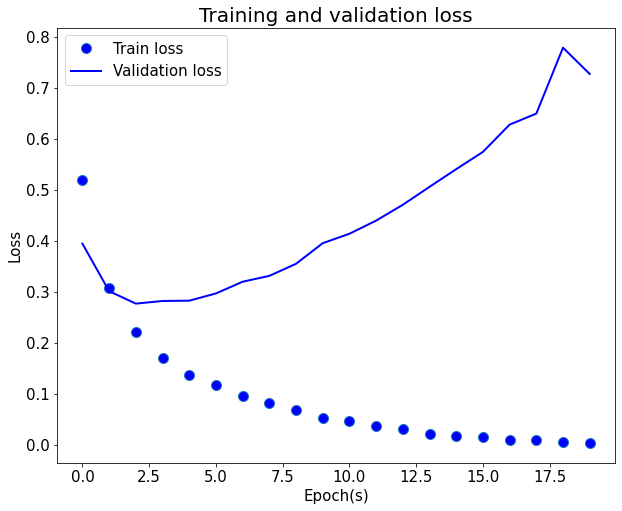

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
train_loss, val_loss = history_dict["loss"], history_dict["val_loss"]
plt.figure(figsize=(10, 8))
plt.plot(train_loss,marker='o', mfc='blue', linestyle='', markersize=10)
plt.plot(val_loss, color='blue', linestyle='-', linewidth=2)
plt.legend(["Train loss", "Validation loss"], fontsize=15)
plt.xlabel("Epoch(s)", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.xticks(fontsize=15)
plt.setp(plt.gca().get_yticklabels(), fontsize=15)
plt.title("Training and validation loss", fontsize=20)
plt.show()

Listing 4.9 Plotting the training and validation accuracy

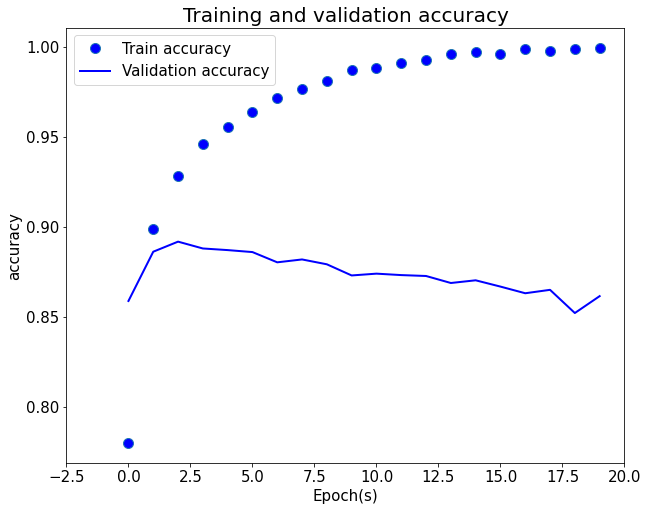

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
train_loss, val_loss = history_dict["binary_accuracy"], history_dict["val_binary_accuracy"]
plt.figure(figsize=(10, 8))
plt.plot(train_loss,marker='o', mfc='blue', linestyle='', markersize=10)
plt.plot(val_loss, color='blue', linestyle='-', linewidth=2)
plt.legend(["Train accuracy", "Validation accuracy"], fontsize=15)
plt.xlabel("Epoch(s)", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.xticks(plt.gca().get_xticks(), fontsize=15)
plt.setp(plt.gca().get_yticklabels(), fontsize=15)
plt.title("Training and validation accuracy", fontsize=20)
plt.show()

Listing 4.10 Retraining a model from scratch

In [ ]:
model = models.Sequential([
                           layers.Dense(units=16, activation="relu"),
                           layers.Dense(units=16, activation="relu"),
                           layers.Dense(units=1, activation="sigmoid")
])
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.BinaryCrossentropy(),
    metrics=metrics.BinaryAccuracy()
)
model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/4
30/30 [==============================] - 2s 41ms/step - loss: 0.5132 - binary_accuracy: 0.7912 - val_loss: 0.3922 - val_binary_accuracy: 0.8598
Epoch 2/4
30/30 [==============================] - 1s 23ms/step - loss: 0.3066 - binary_accuracy: 0.8977 - val_loss: 0.3033 - val_binary_accuracy: 0.8867
Epoch 3/4
30/30 [==============================] - 1s 23ms/step - loss: 0.2245 - binary_accuracy: 0.9270 - val_loss: 0.2937 - val_binary_accuracy: 0.8830
Epoch 4/4
30/30 [==============================] - 1s 23ms/step - loss: 0.1758 - binary_accuracy: 0.9437 - val_loss: 0.2751 - val_binary_accuracy: 0.8896


In [ ]:
results = model.evaluate(x_test, y_test)
print("Results on test data:\nTest loss:{:.2f}\nTest accuracy:{:.2f}%".format(results[0], results[1]*100))

782/782 [==============================] - 3s 4ms/step - loss: 0.2978 - binary_accuracy: 0.8790
Results on test data:
Test loss:0.30
Test accuracy:87.90%


### 4.1.6 Further experiments

The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:

You used two representation layers before the final classification layer. Try using one or three representation layers, and see how doing so affects validation and test accuracy.

Try using layers with more units or fewer units: 32 units, 64 units, and so on.

*   Try using layers with more units or fewer units: 32 units, 64 units, and so on.

*   Try using the mse loss function instead of binary_crossentropy.
*   Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.


Experiment #1: 3 layer NN, 2 representation with 64 units and 1 classificaiton layers, sigmoid in output layer

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.4929 - binary_accuracy: 0.7613 - val_loss: 0.3273 - val_binary_accuracy: 0.8777
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2633 - binary_accuracy: 0.9023 - val_loss: 0.2766 - val_binary_accuracy: 0.8883
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1892 - binary_accuracy: 0.9315 - val_loss: 0.2741 - val_binary_accuracy: 0.8919
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1354 - binary_accuracy: 0.9539 - val_loss: 0.3686 - val_binary_accuracy: 0.8679
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1089 - binary_accuracy: 0.9605 - val_loss: 0.3453 - val_binary_accuracy: 0.8765
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0807 - binary_accuracy: 0.9740 - val_loss: 0.3566 - val_binary_accuracy: 0.8793
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - los

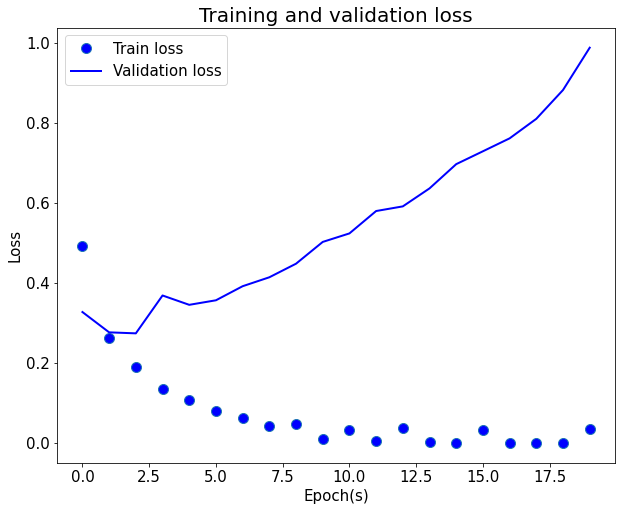

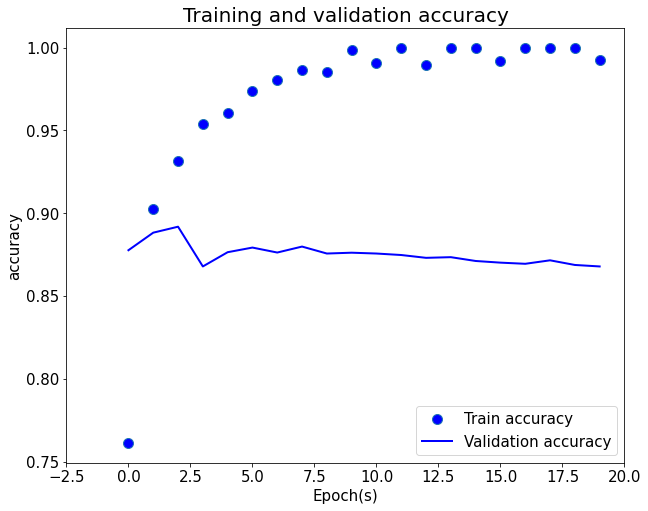

782/782 [==============================] - 3s 4ms/step - loss: 1.0412 - binary_accuracy: 0.8550
Results on test data:
Test loss:1.04
Test accuracy:85.50%


In [ ]:
model = models.Sequential([
                           layers.Dense(units=64, activation="relu"),
                           layers.Dense(units=64, activation="relu"),
                           layers.Dense(units=1, activation="sigmoid")

])
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.BinaryCrossentropy(),
    metrics=metrics.BinaryAccuracy()
)
history = model.fit(
    x = partial_x_train,
    y = partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict = history.history
train_loss, val_loss = history_dict["loss"], history_dict["val_loss"]
plt.figure(figsize=(10, 8))
plt.plot(train_loss,marker='o', mfc='blue', linestyle='', markersize=10)
plt.plot(val_loss, color='blue', linestyle='-', linewidth=2)
plt.legend(["Train loss", "Validation loss"], fontsize=15)
plt.xlabel("Epoch(s)", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.xticks(fontsize=15)
plt.setp(plt.gca().get_yticklabels(), fontsize=15)
plt.title("Training and validation loss", fontsize=20)
plt.show()

history_dict = history.history
train_loss, val_loss = history_dict["binary_accuracy"], history_dict["val_binary_accuracy"]
plt.figure(figsize=(10, 8))
plt.plot(train_loss,marker='o', mfc='blue', linestyle='', markersize=10)
plt.plot(val_loss, color='blue', linestyle='-', linewidth=2)
plt.legend(["Train accuracy", "Validation accuracy"], fontsize=15)
plt.xlabel("Epoch(s)", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.xticks(plt.gca().get_xticks(), fontsize=15)
plt.setp(plt.gca().get_yticklabels(), fontsize=15)
plt.title("Training and validation accuracy", fontsize=20)
plt.show()

results = model.evaluate(x_test, y_test)
print("Results on test data:\nTest loss:{:.2f}\nTest accuracy:{:.2f}%".format(results[0], results[1]*100))

Experiment #1: 3 layer NN, 2 representation with 32 units, linear activation function = tanh and 1 classificaiton layers, activation func = sigmoid in output layer

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.4738 - binary_accuracy: 0.7960 - val_loss: 0.3223 - val_binary_accuracy: 0.8766
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2467 - binary_accuracy: 0.9088 - val_loss: 0.2693 - val_binary_accuracy: 0.8901
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1711 - binary_accuracy: 0.9375 - val_loss: 0.2865 - val_binary_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1308 - binary_accuracy: 0.9540 - val_loss: 0.3121 - val_binary_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1010 - binary_accuracy: 0.9641 - val_loss: 0.3507 - val_binary_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0837 - binary_accuracy: 0.9697 - val_loss: 0.3946 - val_binary_accuracy: 0.8801
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - los

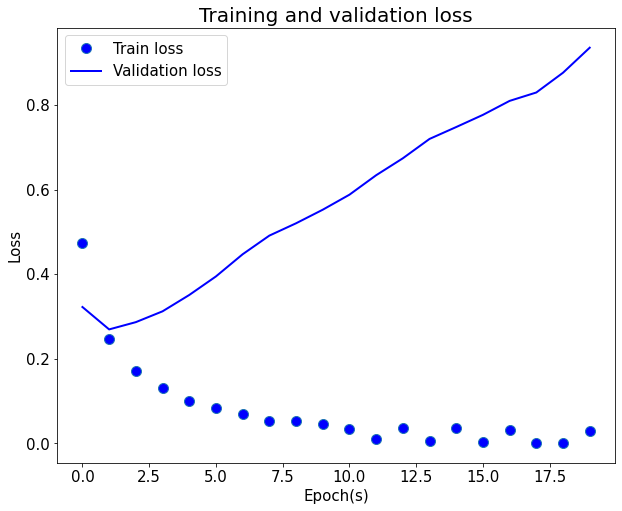

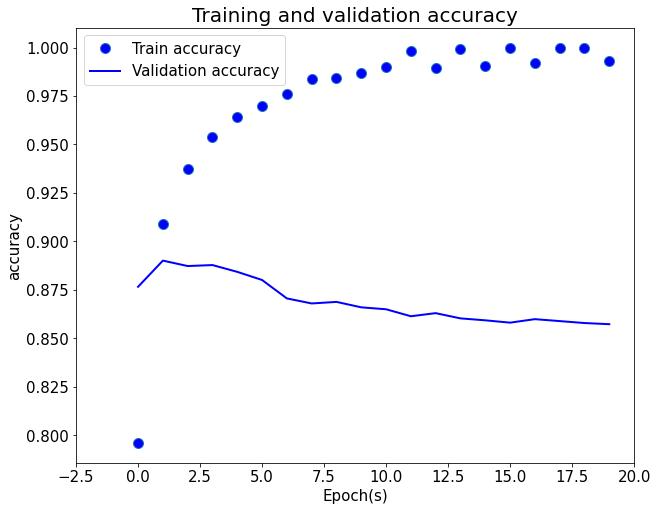

782/782 [==============================] - 3s 4ms/step - loss: 1.0487 - binary_accuracy: 0.8414
Results on test data:
Test loss:1.05
Test accuracy:84.14%


In [ ]:
model = models.Sequential([
                           layers.Dense(units=32, activation="tanh"),
                           layers.Dense(units=32, activation="tanh"),
                           layers.Dense(units=1, activation="sigmoid")

])
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.BinaryCrossentropy(),
    metrics=metrics.BinaryAccuracy()
)
history = model.fit(
    x = partial_x_train,
    y = partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

history_dict = history.history
train_loss, val_loss = history_dict["loss"], history_dict["val_loss"]
plt.figure(figsize=(10, 8))
plt.plot(train_loss,marker='o', mfc='blue', linestyle='', markersize=10)
plt.plot(val_loss, color='blue', linestyle='-', linewidth=2)
plt.legend(["Train loss", "Validation loss"], fontsize=15)
plt.xlabel("Epoch(s)", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.xticks(fontsize=15)
plt.setp(plt.gca().get_yticklabels(), fontsize=15)
plt.title("Training and validation loss", fontsize=20)
plt.show()

history_dict = history.history
train_loss, val_loss = history_dict["binary_accuracy"], history_dict["val_binary_accuracy"]
plt.figure(figsize=(10, 8))
plt.plot(train_loss,marker='o', mfc='blue', linestyle='', markersize=10)
plt.plot(val_loss, color='blue', linestyle='-', linewidth=2)
plt.legend(["Train accuracy", "Validation accuracy"], fontsize=15)
plt.xlabel("Epoch(s)", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.xticks(plt.gca().get_xticks(), fontsize=15)
plt.setp(plt.gca().get_yticklabels(), fontsize=15)
plt.title("Training and validation accuracy", fontsize=20)
plt.show()

results = model.evaluate(x_test, y_test)
print("Results on test data:\nTest loss:{:.2f}\nTest accuracy:{:.2f}%".format(results[0], results[1]*100))

## 4.2 Classifying newswires: a multiclass classification example

### 4.2.1 The Reuters dataset

In [ ]:
from tensorflow.keras import models, layers, metrics, optimizers, losses
from tensorflow.keras import datasets
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Listing 4.11 Loading the Reuters dataset

In [ ]:
(train_data, train_labels), (test_data, test_labels) = datasets.reuters.load_data(num_words=10000)

In [ ]:
print("Number of training samples:", train_data.shape[0])
print("Number of test samples:", test_data.shape[0])

Number of training samples: 8982
Number of test samples: 2246


In [ ]:
print("Sample 1:", train_data[0])
print("Sample 1's label:", train_labels[0])

Sample 1: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Sample 1's label: 3


Listing 4.12 Decoding newswires back to text

In [ ]:
word_index = datasets.reuters.get_word_index()
reverse_word_index = {index: word for word, index in word_index.items()}
#print the ten first text-decoded newswire samples from the training set
for i, sequence in enumerate(train_data[:10]):
  print(sequence)
  print(i, ": ",' '.join([reverse_word_index.get(index - 3, "?") for index in sequence]))

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
0 :  ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 1

In [ ]:
def vectorize_sequences(sequences, num_words=10000):
    results = np.zeros((sequences.shape[0], num_words))
    for i in range(len(sequences)):
      results[i, sequences[i]] = 1
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Listing 4.14 Encoding the labels

In [ ]:
def to_one_hot(labels):
  #find dimension
  if labels.min() == 0:
    dimension = labels.max() + 1
  else:
    dimension = labels.max()
  #initialize encoded labels with zeros
  results = np.zeros((labels.shape[0], dimension))
  results[np.arange(labels.shape[0]), labels] = 1
  return results

In [ ]:
#encode training and test labels
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)
#set apart 
#encode using keras libray
y_train_1 = keras.utils.to_categorical(train_labels)
y_test_1 = keras.utils.to_categorical(test_labels)
#setting apart 1000 samples from training set for validation set
pert_indices = np.random.permutation(x_train.shape[0])
x_val = x_train[pert_indices[:1000]]
y_val = y_train[pert_indices[:1000]]
partial_x_train = x_train[pert_indices[1000:]]
partial_y_train = y_train[pert_indices[1000:]]

Listing 4.15 Model definition

In [ ]:
#define the model for reteurs newswire
model = models.Sequential([
                           layers.Dense(units=64, activation="relu"),
                           layers.Dense(units=64, activation="relu"),
                           layers.Dense(units=46, activation="softmax")
])

Listing 4.16 Compiling the model

In [ ]:
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.CategoricalCrossentropy(),
    metrics=metrics.CategoricalAccuracy()
)

Listing 4.18 Training the model

In [ ]:
history = model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=20, 
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 2.6069 - categorical_accuracy: 0.4271 - val_loss: 1.7383 - val_categorical_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.3841 - categorical_accuracy: 0.7185 - val_loss: 1.3262 - val_categorical_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0302 - categorical_accuracy: 0.7745 - val_loss: 1.1669 - val_categorical_accuracy: 0.7240
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8111 - categorical_accuracy: 0.8255 - val_loss: 1.0592 - val_categorical_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6490 - categorical_accuracy: 0.8599 - val_loss: 1.0061 - val_categorical_accuracy: 0.7780
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5128 - categorical_accuracy: 0.8919 - val_loss: 0.9258 - val_categorical_accuracy: 0.7970
Epoch 7/20

In [ ]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

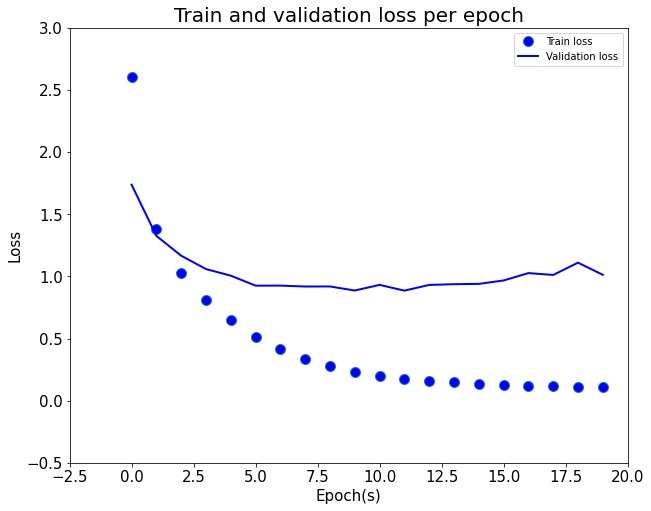

In [ ]:
history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
plt.figure(figsize=(10, 8))
plt.plot(loss, marker='o', mfc='blue', markersize=10, linestyle='', label="Train loss")
plt.plot(val_loss, linestyle='-', color='blue', linewidth=2, label="Validation loss")
plt.xlabel("Epoch(s)", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.title("Train and validation loss per epoch", fontsize=20)
plt.xticks(plt.gca().get_xticks(), fontsize=15)
plt.yticks(plt.gca().get_yticks(), fontsize=15)
plt.legend()
plt.show();

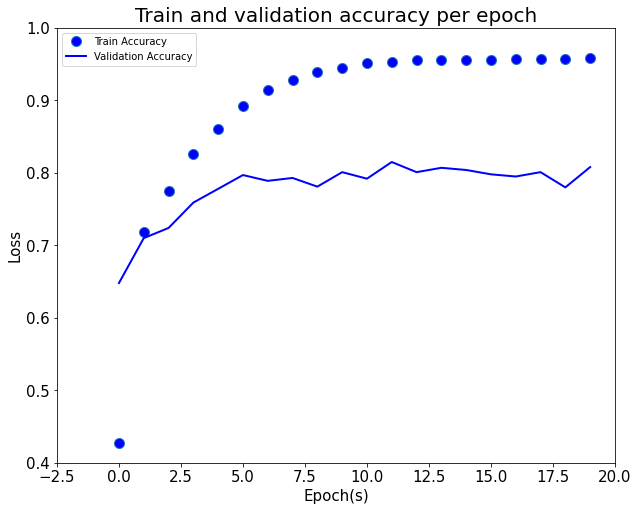

In [ ]:
history_dict = history.history
loss = history_dict["categorical_accuracy"]
val_loss = history_dict["val_categorical_accuracy"]
plt.figure(figsize=(10, 8))
plt.plot(loss, marker='o', mfc='blue', markersize=10, linestyle='', label="Train Accuracy")
plt.plot(val_loss, linestyle='-', color='blue', linewidth=2, label="Validation Accuracy")
plt.xlabel("Epoch(s)", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.title("Train and validation accuracy per epoch", fontsize=20)
plt.xticks(plt.gca().get_xticks(), fontsize=15)
plt.yticks(plt.gca().get_yticks(), fontsize=15)
plt.legend()
plt.show();

The model starts to overfit after the ${10th}$ epoch, so we are going to retrain the model with only 9 epochs

#### Listing 4.21 Retraining a model from scratch

In [ ]:
model = models.Sequential([
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=46, activation="softmax")
])
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.CategoricalCrossentropy(),
    metrics=metrics.CategoricalAccuracy()
)
model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=10,
    batch_size=512,
    validation_data=(x_val, y_val)
)
print("Loss and accuracy of the model on the test set:\nTest Loss: {:.2f}\nTest Accuracy: {:.2f}".format(*model.evaluate(x_test, y_test)))

Epoch 1/10
16/16 [==============================] - 1s 32ms/step - loss: 2.6146 - categorical_accuracy: 0.4774 - val_loss: 1.7807 - val_categorical_accuracy: 0.6370
Epoch 2/10
16/16 [==============================] - 0s 16ms/step - loss: 1.3950 - categorical_accuracy: 0.7112 - val_loss: 1.3457 - val_categorical_accuracy: 0.7010
Epoch 3/10
16/16 [==============================] - 0s 17ms/step - loss: 1.0227 - categorical_accuracy: 0.7831 - val_loss: 1.1621 - val_categorical_accuracy: 0.7400
Epoch 4/10
16/16 [==============================] - 0s 16ms/step - loss: 0.8021 - categorical_accuracy: 0.8341 - val_loss: 1.0506 - val_categorical_accuracy: 0.7660
Epoch 5/10
16/16 [==============================] - 0s 17ms/step - loss: 0.6353 - categorical_accuracy: 0.8733 - val_loss: 1.0025 - val_categorical_accuracy: 0.7700
Epoch 6/10
16/16 [==============================] - 0s 16ms/step - loss: 0.5024 - categorical_accuracy: 0.8975 - val_loss: 0.9213 - val_categorical_accuracy: 0.7900
Epoch 7/10

  ### 4.2.5 Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)
print("Shape of the returned vector for the test sample 1containing a class probability distribution over all 46 topic labels:", predictions[0].shape)
print("Sum of all the predicted class probablities for test sample 1:", np.sum(predictions[0]))
print("Index with the largest probability, which is also the predicted clasas label for test sample 1:", np.argmax(predictions[0]))

Shape of the returned vector for the test sample 1containing a class probability distribution over all 46 topic labels: (46,)
Sum of all the predicted class probablities for test sample 1: 0.99999994
Index with the largest probability, which is also the predicted clasas label for test sample 1: 4


### 4.2.6 A different way to handle the labels and the loss

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
#another way to encode the labels is to cast them as an integer tensor
y_val = np.array(train_labels[:1000])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
partial_y_train = np.array(train_labels[1000:])

y_test = np.array(test_labels)
#in this way, spare_categorical_crossentropy is chosen as the loss function
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)
model.fit(
    x=partial_x_train,
    y=partial_y_train,
    batch_size=512,
    epochs=20,
    validation_data=(x_val, y_val)
)
print("Loss:{}\nSparse Categorical Accuracy:{}".format(*model.evaluate(x_test, y_test)))

Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 0.0732 - accuracy: 0.9573 - val_loss: 1.8767 - val_accuracy: 0.7920
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 0.0598 - accuracy: 0.9593 - val_loss: 2.0414 - val_accuracy: 0.7830
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 0.0594 - accuracy: 0.9600 - val_loss: 1.9596 - val_accuracy: 0.7880
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.0601 - accuracy: 0.9599 - val_loss: 2.0887 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.0586 - accuracy: 0.9592 - val_loss: 1.9972 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.0599 - accuracy: 0.9580 - val_loss: 2.0749 - val_accuracy: 0.7830
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.0590 - accuracy: 0.9577 - val_loss: 2.0752 - val_accuracy: 0.7830
Epoch 8/20
16

### 4.2.7 The importance of having sufficiently large intermediate layers

#### Listing 4.22 A model with an information bottleneck

In [ ]:
#encode training and test labels
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)
#setting apart 1000 samples from training set for validation set
pert_indices = np.random.permutation(x_train.shape[0])
x_val = x_train[pert_indices[:1000]]
y_val = y_train[pert_indices[:1000]]
partial_x_train = x_train[pert_indices[1000:]]
partial_y_train = y_train[pert_indices[1000:]]

In [ ]:
model = models.Sequential([
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=4, activation="relu"),
    layers.Dense(units=46, activation="softmax")
])
model.compile(
    optimizer=optimizers.RMSprop(),
    loss=losses.CategoricalCrossentropy(),
    metrics=metrics.CategoricalAccuracy()
)
model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 2.7489 - categorical_accuracy: 0.3621 - val_loss: 2.1685 - val_categorical_accuracy: 0.4170
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.8649 - categorical_accuracy: 0.4644 - val_loss: 1.7359 - val_categorical_accuracy: 0.5770
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.4551 - categorical_accuracy: 0.6457 - val_loss: 1.5340 - val_categorical_accuracy: 0.6340
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 1.1990 - categorical_accuracy: 0.7001 - val_loss: 1.3892 - val_categorical_accuracy: 0.6600
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0360 - categorical_accuracy: 0.7169 - val_loss: 1.3581 - val_categorical_accuracy: 0.6870
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9374 - categorical_accuracy: 0.7458 - val_loss: 1.3307 - val_categorical_accuracy: 0.6870
Epoch 7/20
63/6

In [ ]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 2.1441 - categorical_accuracy: 0.6968


[2.144087553024292, 0.6967942714691162]

The model now peaks at 71% accuracy on validation set, it means that the model has dropped around 7-8% of relevant information for its representation learning

## 4.3 Predicting house prices: a regression example

### 4.3.1 The Boston Housing Price dataset

In [1]:
from tensorflow import keras
from tensorflow.keras import datasets, models, layers, metrics, losses, optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = datasets.boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [3]:
print("Dimension of train and test datasets:\nTrain data: {}\nTest data: {}".format(train_data.shape, test_data.shape))

Dimension of train and test datasets:
Train data: (404, 13)
Test data: (102, 13)


In [4]:
a = np.array([[1,2], [3,4]])
a.mean(axis=0)

array([2., 3.])

In [5]:
#feature standardization for different features to fall into homogeneous range of values
train_data = (train_data - np.mean(train_data, axis=0)) / train_data.std(axis=0)
test_data = (test_data - np.mean(test_data, axis=0)) / test_data.std(axis=0)

### 4.3.3 Building your model

In [6]:
def build_model():
  model = models.Sequential([
      layers.Dense(units=64, activation="relu"),
      layers.Dense(units=64, activation="relu"),
      layers.Dense(units=1)
  ])
  model.compile(
      optimizer=optimizers.RMSprop(),
      loss=losses.MeanSquaredError(),
      metrics=metrics.MeanAbsoluteError()
  )
  return model

### 4.3.4 Validating your approach using K-fold validation

#### Listing 4.26 K-fold validation


In [7]:
k = 4
num_val_samples = train_data.shape[0] // k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"Processing fold #{i:d}:")
  x_val = train_data[i * num_val_samples : (i + 1) * num_val_samples]
  y_val = train_labels[i * num_val_samples : (i + 1) * num_val_samples]
  partial_x_train = np.concatenate([
                                    train_data[:i * num_val_samples],
                                    train_data[(i + 1) * ( num_val_samples):]
  ])
  partial_y_train = np.concatenate([
                                    train_labels[:i * num_val_samples],
                                    train_labels[(i + 1) * num_val_samples:]
  ])
  model = build_model()
  model.fit(
      x=partial_x_train,
      y=partial_y_train,
      epochs=num_epochs,
      batch_size=16,
      verbose=0
  )
  mse, mae = model.evaluate(
      x=x_val,
      y=y_val,
      verbose=0
  )
  all_scores.append(mae)

Processing fold #0:
Processing fold #1:
Processing fold #2:
Processing fold #3:


In [8]:
print("Validation scores after 4-fold validation:", all_scores)
print(f"Average of the validation Mean Absolute Error after 4-fold validation: {np.mean(all_scores):.2f}")

Validation scores after 4-fold validation: [1.9984707832336426, 2.685182571411133, 2.4980826377868652, 2.381985902786255]
Average of the validation Mean Absolute Error after 4-fold validation: 2.39


#### Listing 4.27 Saving the validation logs at each fold

In [ ]:
k = 4
num_val_samples = train_data.shape[0] // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i:d}:")
  x_val = train_data[i * num_val_samples : (i + 1) * num_val_samples]
  y_val = train_labels[i * num_val_samples : (i + 1) * num_val_samples]
  partial_x_train = np.concatenate([
                                    train_data[:i * num_val_samples],
                                    train_data[(i + 1) * ( num_val_samples):]
  ])
  partial_y_train = np.concatenate([
                                    train_labels[:i * num_val_samples],
                                    train_labels[(i + 1) * num_val_samples:]
  ])
  model = build_model()
  history = model.fit(
      x=partial_x_train,
      y=partial_y_train,
      epochs=num_epochs,
      batch_size=16,
      verbose=0,
      validation_data = (x_val, y_val)
  )
  mae_history = history.history["val_mean_absolute_error"]
  print(mae_history)
  all_scores.append(mae_history)


Processing fold #0:
[18.755752563476562, 15.347831726074219, 11.12242603302002, 7.264951229095459, 4.9838786125183105, 3.9471874237060547, 3.425826072692871, 3.33493971824646, 3.229814052581787, 2.9993255138397217, 2.843951940536499, 2.6882576942443848, 2.6424736976623535, 2.5624582767486572, 2.551405191421509, 2.4472789764404297, 2.400728940963745, 2.3323051929473877, 2.318587303161621, 2.2088394165039062, 2.1327366828918457, 2.118837833404541, 2.0561273097991943, 2.193308115005493, 2.1643378734588623, 2.174542188644409, 1.9646968841552734, 1.9764273166656494, 2.114041566848755, 2.1332387924194336, 1.9462835788726807, 2.1399075984954834, 1.9812991619110107, 1.9381672143936157, 1.8942623138427734, 1.8822053670883179, 1.8639825582504272, 1.96392023563385, 1.941847801208496, 1.8342803716659546, 1.8149521350860596, 1.9389595985412598, 1.8324695825576782, 1.9817867279052734, 1.9429428577423096, 2.083719253540039, 2.257652759552002, 1.979920744895935, 1.9663386344909668, 1.9562333822250366,

In [16]:
all_scores[0]

1.9984707832336426